In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/npk-crop-recmendation/crop_recommendation.csv')

In [2]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
print(df.shape)

(2200, 8)


In [5]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


We can change the column type with the astype method. Let's apply this method to the Churn feature to convert it into int64

In [7]:
df["N"] = df["N"].astype("int64")

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463660
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958397
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df["N"].value_counts()

N
40     44
22     44
27     42
39     41
31     41
       ..
132     2
46      1
135     1
130     1
139     1
Name: count, Length: 137, dtype: int64

In [10]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [11]:
df["label"].value_counts(normalize=True)

label
rice           0.045455
maize          0.045455
chickpea       0.045455
kidneybeans    0.045455
pigeonpeas     0.045455
mothbeans      0.045455
mungbean       0.045455
blackgram      0.045455
lentil         0.045455
pomegranate    0.045455
banana         0.045455
mango          0.045455
grapes         0.045455
watermelon     0.045455
muskmelon      0.045455
apple          0.045455
orange         0.045455
papaya         0.045455
coconut        0.045455
cotton         0.045455
jute           0.045455
coffee         0.045455
Name: proportion, dtype: float64

In [12]:
df.sort_values(by="label", ascending=False).head()

,N,P,K,temperature,humidity,ph,rainfall,label
1399,120,24,47,26.986037,89.413849,6.260839,58.548767,watermelon
1336,119,7,55,26.038677,84.637838,6.031424,44.399338,watermelon
1326,91,21,50,24.335282,81.440304,6.762030,48.321136,watermelon
1327,116,5,54,25.376013,80.993135,6.653987,57.230285,watermelon
1328,112,28,54,24.860946,85.053186,6.738031,55.295635,watermelon


In [13]:
df.sort_values(by=["label", "rainfall"], ascending=[True, False]).head()

,N,P,K,temperature,humidity,ph,rainfall,label
1544,2,123,205,22.366293,90.785725,5.739652,124.983162,apple
1599,10,140,197,22.169395,90.271856,6.229499,124.468311,apple
1535,23,138,195,22.490951,91.702927,5.795986,124.391510,apple
1554,2,131,199,22.474205,91.227597,6.017370,124.217970,apple
1585,35,142,203,21.170892,90.237302,5.895319,123.649515,apple


**Indexing and retrieving data**
A DataFrame can be indexed in a few different ways.

To get a single column, you can use a DataFrame['Name'] construction. Let's use this to answer a question about that column alone: what is the proportion of churned users in our dataframe?

In [14]:
df["N"].mean()

50.551818181818184

What are average values of numerical ?

In [15]:
df[df["N"] == 50.55].mean()

N              NaN
P              NaN
K              NaN
temperature    NaN
humidity       NaN
ph             NaN
rainfall       NaN
label          NaN
dtype: object

In [16]:
df.loc[0:5, "N":"label"]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice


In [17]:
df.iloc[0:5, 0:4]

,N,P,K,temperature
0,90,42,43,20.879744
1,85,58,41,21.770462
2,60,55,44,23.004459
3,74,35,40,26.491096
4,78,42,42,20.130175


In [18]:
df.iloc[0:5, 0:3]

,N,P,K
0,90,42,43
1,85,58,41
2,60,55,44
3,74,35,40
4,78,42,42


In [19]:
df[-1:]

,N,P,K,temperature,humidity,ph,rainfall,label
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [20]:
df[1:4]

,N,P,K,temperature,humidity,ph,rainfall,label
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


**Applying Functions to Cells, Columns and Rows**
*To apply functions to each column, use apply()*

In [21]:
import numpy as np

In [22]:

df.apply(np.max)

N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

The apply method can also be used to apply a function to each row. To do this, specify axis=1. Lambda functions are very convenient in such scenarios. For example, if we need to select all Label starting with r, we can do it like this:

In [23]:
df[df["label"].apply(lambda label: label[0] == "r")].head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:

In [24]:
d = {"rice": "RICE", "coffee": "COFFEE"}
df["label"] = df["label"].map(d)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,RICE
1,85,58,41,21.770462,80.319644,7.038096,226.655537,RICE
2,60,55,44,23.004459,82.320763,7.840207,263.964248,RICE
3,74,35,40,26.491096,80.158363,6.980401,242.864034,RICE
4,78,42,42,20.130175,81.604873,7.628473,262.717340,RICE


**Grouping**
In general, grouping data in Pandas works as follows:

> df.groupby(by=grouping_columns)[columns_to_show].function()

* First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
* 
* Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
* 
* Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:

In [25]:
columns_to_show = ["N", "P", "K"]

df.groupby(["label"])[columns_to_show].describe(percentiles=[])

N                                             P                   \
        count    mean        std   min    50%    max  count   mean       std   
label                                                                          
COFFEE  100.0  101.20  12.345203  80.0  103.0  120.0  100.0  28.74  7.276113   
RICE    100.0   79.89  11.917981  60.0   80.0   99.0  100.0  47.58  7.904966   

                              K                                     
         min   50%   max  count   mean       std   min   50%   max  
label                                                               
COFFEE  15.0  29.0  40.0  100.0  29.94  3.246817  25.0  30.0  35.0  
RICE    35.0  47.0  60.0  100.0  39.87  2.946167  35.0  40.0  45.0

In [26]:
columns_to_show = ["N", "P", "K"]
df.groupby(["label"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

/tmp/ipykernel_34/3702311890.py:2: FutureWarning: The provided callable <function mean at 0x78a31448c550> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["label"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
/tmp/ipykernel_34/3702311890.py:2: FutureWarning: The provided callable <function std at 0x78a31448c670> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(["label"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
/tmp/ipykernel_34/3702311890.py:2: FutureWarning: The provided callable <function min at 0x78a31445fd00> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby

N                          P                        K            \
          mean        std min  max   mean       std min max   mean       std   
label                                                                          
COFFEE  101.20  12.345203  80  120  28.74  7.276113  15  40  29.94  3.246817   
RICE     79.89  11.917981  60   99  47.58  7.904966  35  60  39.87  2.946167   

                
       min max  
label           
COFFEE  25  35  
RICE    35  45

**Summary tables**
Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a **contingency table** using the crosstab method:

In [27]:
pd.crosstab(df["label"], df["N"])

N,60,61,62,63,64,65,66,67,68,69,...,111,112,113,114,115,116,117,118,119,120
label,,,,,,,,,,,,,,,,,,,,,
COFFEE,0,0,0,0,0,0,0,0,0,0,...,4,2,3,2,1,5,4,5,1,3
RICE,7,2,1,1,1,2,2,5,2,3,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['label'].isnull().sum()

2000

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by number.


In [29]:
df.loc[0:3, "N":"ph"]

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401


In [30]:
#df.iloc[Number of rows, No of column]
df.iloc[0:5, 0:3]


,N,P,K
0,90,42,43
1,85,58,41
2,60,55,44
3,74,35,40
4,78,42,42


To apply functions to each column, use apply():

In [33]:
import numpy as np
df=pd.read_csv('/kaggle/input/npk-crop-recmendation/crop_recommendation.csv')
df.apply(np.max)

N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

The map method can be used to **replace values **in a column by passing a dictionary of the **form {old_value: new_value}** as its argument:

In [ ]:
d = {"rice": "RICE", "watermelon": "WATERrmelon"}
df["label"] = df["label"].map(d)
df.head()

**The same thing can be done with the replace method:**

In [ ]:
df = df.replace({"label": d})
df.head()

> **Grouping**

In general, grouping data in Pandas works as follows:

> df.groupby(by=grouping_columns)[columns_to_show].function()

* First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
* Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
* Finally, one or several functions are applied to the obtained groups per selected columns.
Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:

In [ ]:
columns_to_show = ["N", "P", "K"]

df.groupby(["ph"])[columns_to_show].describe(percentiles=[])

In [34]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

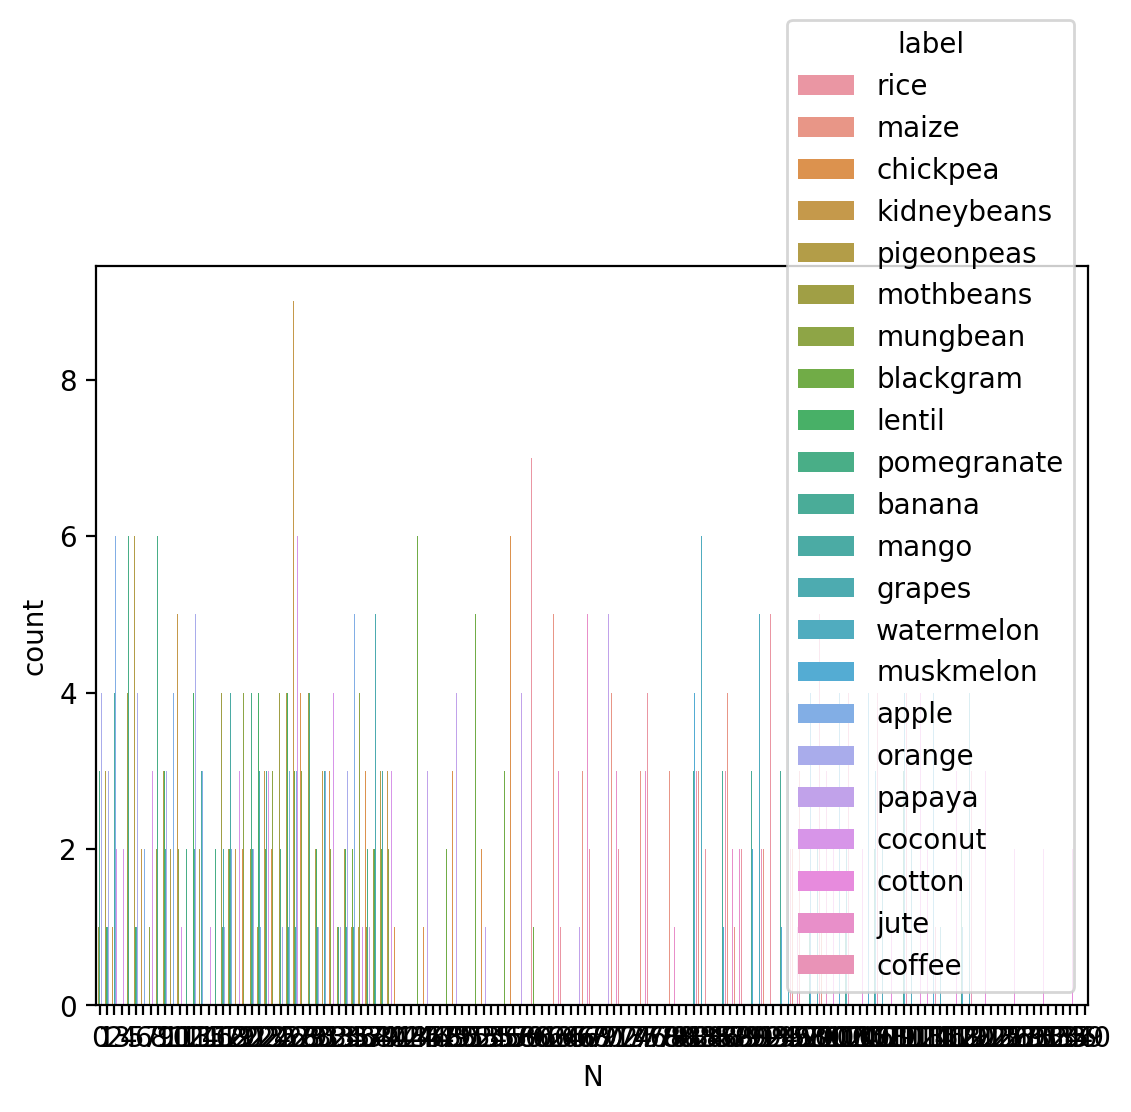

In [35]:
sns.countplot(x="N", hue="label", data=df);

In [36]:
pd.crosstab(df["N"], df["label"], margins=True)

label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon,All
N,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,4,0,0,1,0,2,...,1,1,0,4,0,1,3,0,0,27
1,2,0,0,0,3,0,0,1,0,1,...,0,2,0,3,0,3,1,0,0,20
2,6,0,0,0,2,0,0,1,0,1,...,2,3,0,0,0,1,2,0,0,26
3,1,0,0,0,2,0,0,2,0,2,...,3,0,0,0,0,3,3,0,0,21
4,0,0,0,0,0,0,0,2,0,1,...,4,5,0,3,0,1,6,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
136,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
139,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


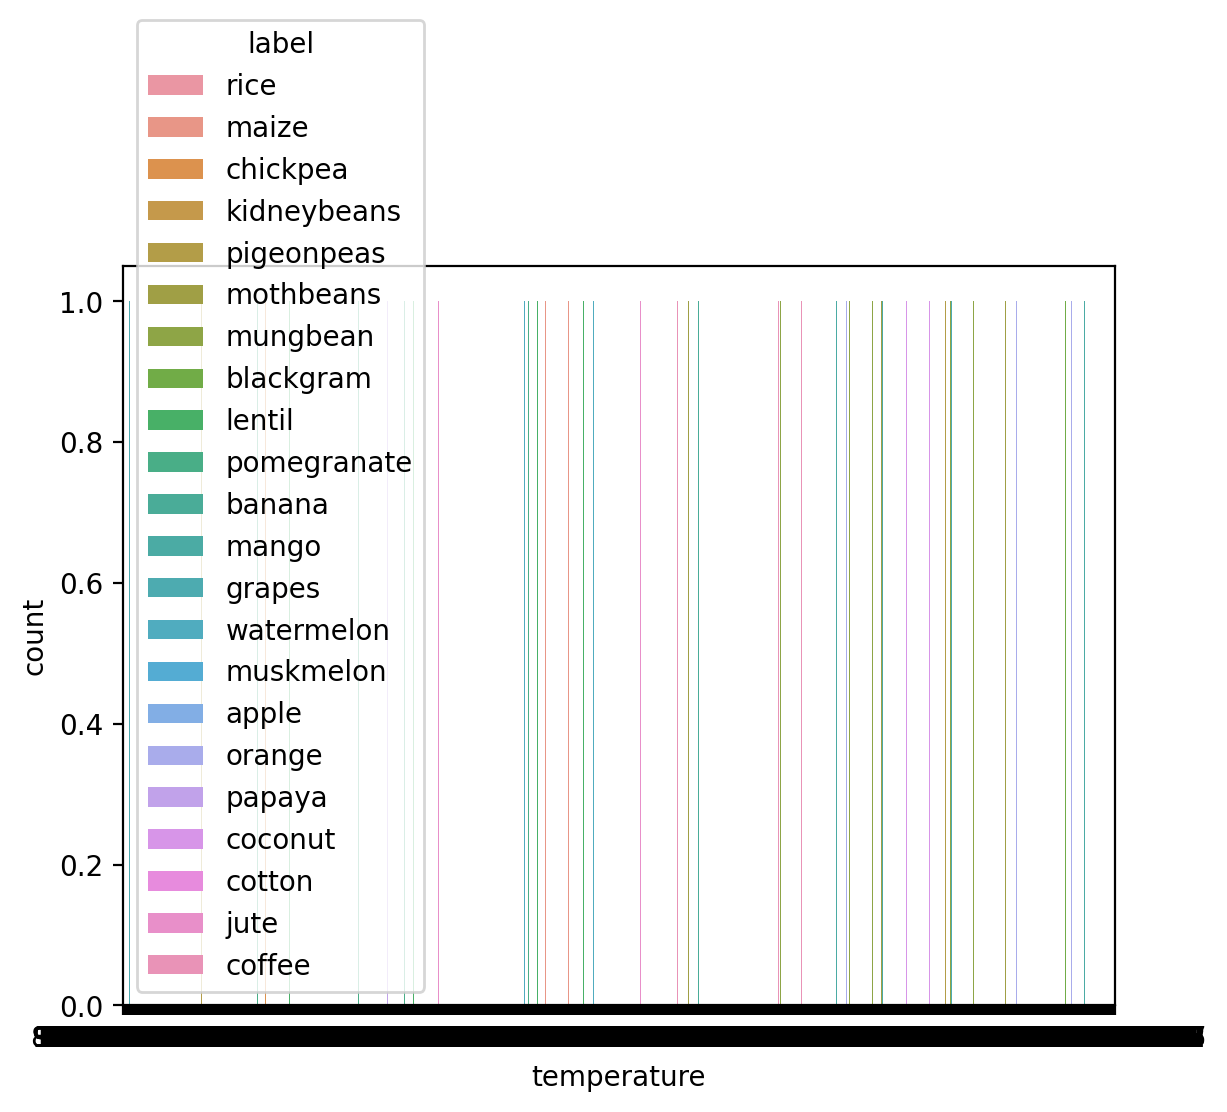

In [37]:
sns.countplot(x="temperature", hue="label", data=df);

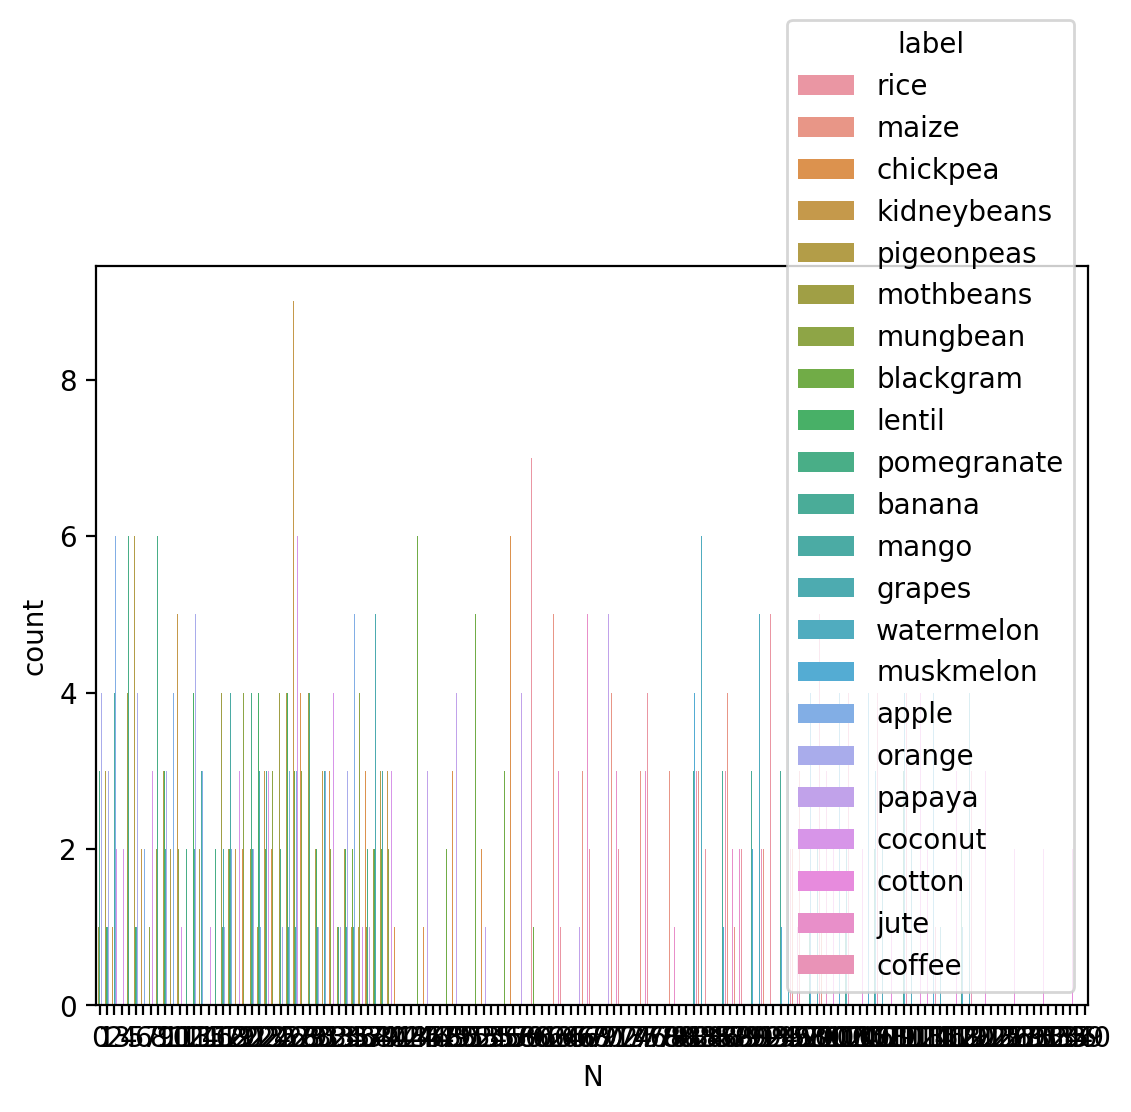

In [38]:
sns.countplot(x="N", hue="label", data=df);

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
df=pd.read_csv('/kaggle/input/npk-crop-recmendation/crop_recommendation.csv')

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_scores}")
print(f"Random Forest Mean Score: {rf_scores.mean():.2f}")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=5)
print(f"Gradient Boosting Cross-Validation Scores: {gb_scores}") 
print(f"Gradient Boosting Mean Score: {gb_scores.mean():.2f}")

Random Forest Cross-Validation Scores: [0.99772727 0.99090909 0.99772727 0.99545455 0.99090909]
Random Forest Mean Score: 0.99
Gradient Boosting Cross-Validation Scores: [0.99090909 0.98863636 0.99318182 0.99772727 0.98636364]
Gradient Boosting Mean Score: 0.99


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load data
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X, y, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {lr_scores}")
print(f"Logistic Regression Mean Score: {lr_scores.mean():.2f}")

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X, y, cv=5)
print(f"K-Nearest Neighbors Cross-Validation Scores: {knn_scores}")
print(f"K-Nearest Neighbors Mean Score: {knn_scores.mean():.2f}")

# Support Vector Machines
svm = SVC()
svm_scores = cross_val_score(svm, X, y, cv=5)
print(f"Support Vector Machines Cross-Validation Scores: {svm_scores}")
print(f"Support Vector Machines Mean Score: {svm_scores.mean():.2f}")

# Decision Tree
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=5)
print(f"Decision Tree Cross-Validation Scores: {dt_scores}")
print(f"Decision Tree Mean Score: {dt_scores.mean():.2f}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.95       0.96363636 0.95909091 0.96136364 0.94772727]
Logistic Regression Mean Score: 0.96
K-Nearest Neighbors Cross-Validation Scores: [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]
K-Nearest Neighbors Mean Score: 0.98
Support Vector Machines Cross-Validation Scores: [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]
Support Vector Machines Mean Score: 0.98
Decision Tree Cross-Validation Scores: [0.99090909 0.98409091 0.99318182 0.98636364 0.98181818]
Decision Tree Mean Score: 0.99


In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on new input data
new_data = pd.DataFrame({'N': [150], 'P': [50], 'K': [40],
                         'temperature': [25.0], 'humidity': [70.0],
                         'ph': [6.5], 'rainfall': [120.0]})

predictions = rf.predict(new_data)
print(f"Predicted label for the new input: {predictions[0]}")

Predicted label for the new input: coffee


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df=pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")
    print()
# Make predictions on new input data
    new_data = pd.DataFrame({'N': [150], 'P': [50], 'K': [40],
                         'temperature': [25.0], 'humidity': [70.0],
                         'ph': [6.5], 'rainfall': [120.0]})
    new_data_scaled = scaler.transform(new_data)

# Choose the best model based on cross-validation scores
    best_model = models[0][1]  # Change this to the model with the highest score
    predictions = best_model.predict(new_data_scaled)
    print(f"Predicted label for the new input: {predictions[0]}")


Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

Predicted label for the new input: cotton
K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Predicted label for the new input: cotton
Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Predicted label for the new input: cotton
Decision Tree Cross-Validation Scores: [0.98579545 0.98295455 0.97727273 0.99715909 0.98011364]
Decision Tree Mean Score: 0.98

Predicted label for the new input: cotton
Random Forest Cross-Validation Scores: [0.99147727 1.         0.99431818 0.99715909 0.99431818]
Random Forest Mean Score: 1.00

Predicted label for the new input: cotton
Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98579545 0.99431818 0.99431818]
Gradie

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df=pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")
    print()



Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Decision Tree Cross-Validation Scores: [0.98295455 0.99147727 0.98011364 0.99715909 0.98295455]
Decision Tree Mean Score: 0.99

Random Forest Cross-Validation Scores: [0.98295455 1.         0.99147727 0.99715909 0.99715909]
Random Forest Mean Score: 0.99

Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98863636 0.99431818 0.99431818]
Gradient Boosting Mean Score: 0.99



Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Decision Tree Cross-Validation Scores: [0.98011364 0.99147727 0.98579545 0.99431818 0.98295455]
Decision Tree Mean Score: 0.99

Random Forest Cross-Validation Scores: [0.98579545 1.         0.99147727 0.99715909 0.99715909]
Random Forest Mean Score: 0.99

Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98579545 0.99431818 0.99431818]
Gradient Boosting Mean Score: 0.99



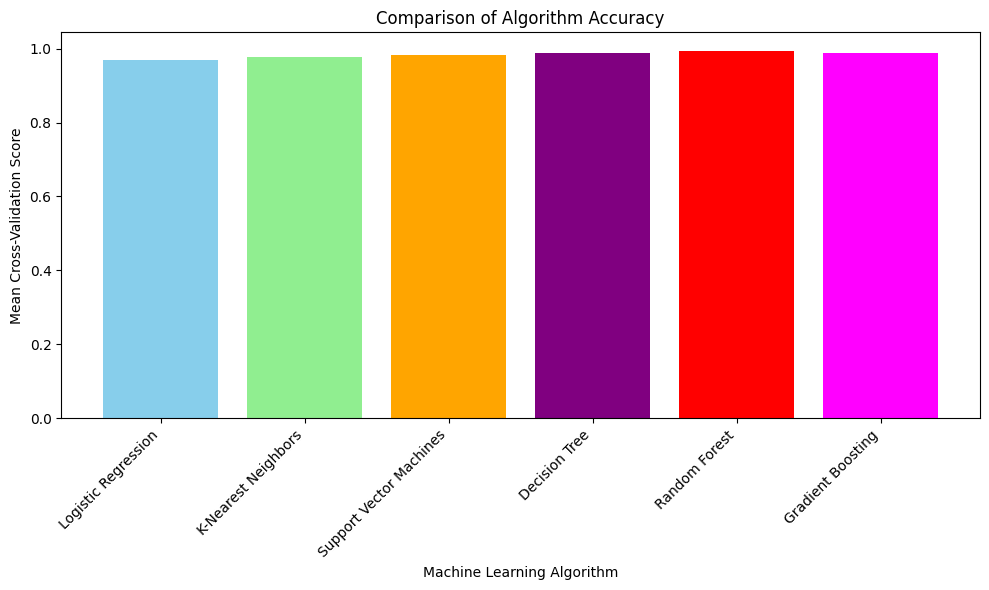

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Store mean scores for each model
mean_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")
    print()

# Extract model names from the list
model_names = [model_name for model_name, _ in models]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(model_names, mean_scores, color=['skyblue', 'lightgreen', 'orange', 'purple', 'red', 'magenta'])
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Comparison of Algorithm Accuracy")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Decision Tree Cross-Validation Scores: [0.98011364 0.99147727 0.98011364 0.99715909 0.98295455]
Decision Tree Mean Score: 0.99

Random Forest Cross-Validation Scores: [0.98863636 1.         0.99431818 0.99715909 0.99715909]
Random Forest Mean Score: 1.00

Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98579545 0.99431818 0.99431818]
Gradient Boosting Mean Score: 0.99



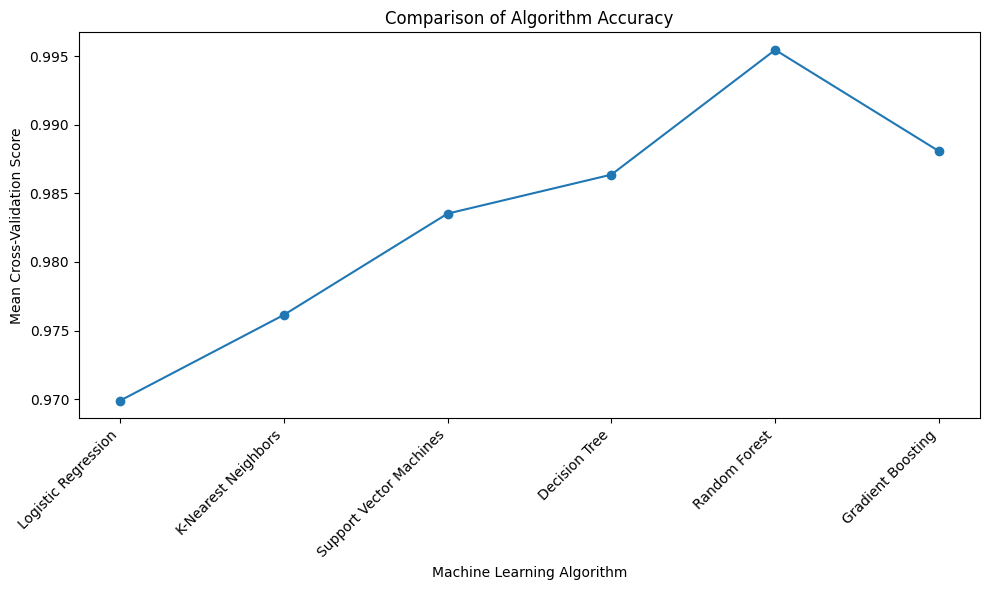

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Store mean scores for each model
mean_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")
    print()
# Extract model names and mean scores
model_names = [model_name for model_name, _ in models]
mean_scores = [score for score in mean_scores]  # Assuming mean_scores is a list

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(model_names, mean_scores, marker='o', linestyle='-')  # Adjust marker and line style
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Comparison of Algorithm Accuracy")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Decision Tree Cross-Validation Scores: [0.98579545 0.99431818 0.98579545 0.99715909 0.98011364]
Decision Tree Mean Score: 0.99

Random Forest Cross-Validation Scores: [0.98863636 1.         0.99431818 0.99715909 0.99715909]
Random Forest Mean Score: 1.00

Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98295455 0.99431818 0.99431818]
Gradient Boosting Mean Score: 0.99



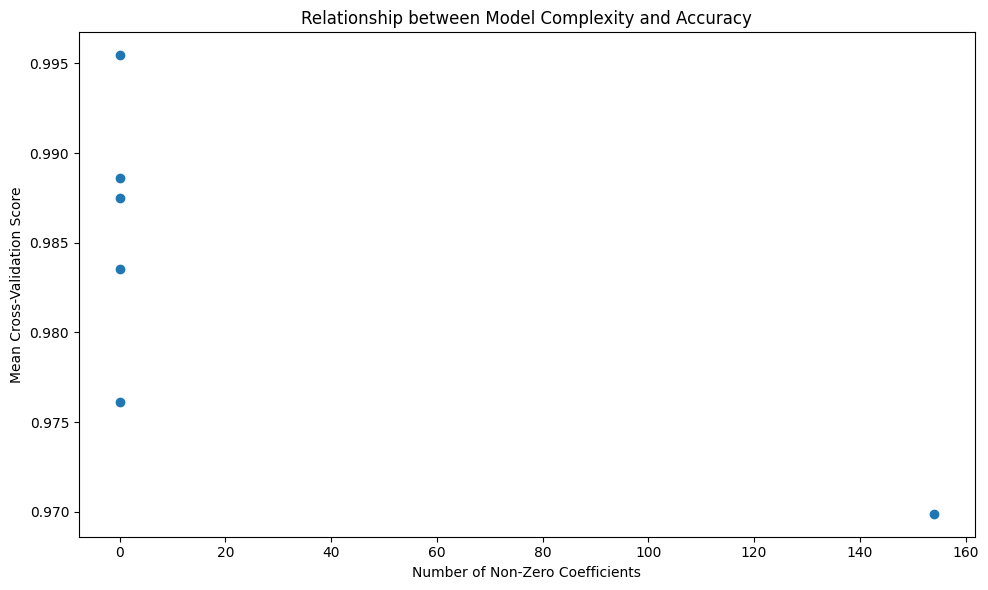

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Store mean scores for each model
mean_scores = []
# Store model complexity estimates (using two methods)
model_complexity_params = []  # Stores number of non-zero elements in coefficients
model_complexity_depth = []  # Stores maximum depth of ensemble (for Random Forest)
for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")

    # Model complexity estimate 1: Number of non-zero elements in coefficients (general approach)
    if hasattr(model, 'coef_'):  # Check if model has 'coef_' attribute
        model_complexity_params.append(np.count_nonzero(model.coef_))
    else:
        model_complexity_params.append(0)  # Set 0 for models without coefficients

    # Model complexity estimate 2: Maximum depth of ensemble (for Random Forest)
    if isinstance(model, RandomForestClassifier):
        model_complexity_depth.append(model.estimators_[0].get_depth())  # Access depth of first tree
    elif isinstance(model, DecisionTreeClassifier):
        model_complexity_depth.append(model.get_depth())
    else:
        model_complexity_depth.append(0)  # Set 0 for non-tree models

    print()

# Import numpy for counting non-zero elements (if not already imported)
import numpy as np

# Extract model names from the list (corrected the typo)
model_names = [model_name for model_name in models]

# **Option 1: Scatter plot using number of non-zero elements**
# Create the scatter plot (replace with model_complexity_depth for tree depth)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(model_complexity_params, mean_scores)
plt.xlabel("Number of Non-Zero Coefficients")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Relationship between Model Complexity and Accuracy")

# **Option 2: Line plot using maximum depth (for ensemble models)**
# plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# plt.plot(model_complexity_depth, mean_scores, marker='o', linestyle='-')
# plt.xlabel("Maximum Ensemble Depth")  # Change label if using depth
# plt.ylabel("Mean Cross-Validation Score")
# plt.title("Relationship between Model Complexity and Accuracy")

# Display the plot
plt.tight_layout()
plt.show()


Logistic Regression Cross-Validation Scores: [0.95738636 0.96590909 0.98579545 0.96590909 0.97443182]
Logistic Regression Mean Score: 0.97

K-Nearest Neighbors Cross-Validation Scores: [0.97159091 0.97443182 0.97443182 0.98011364 0.98011364]
K-Nearest Neighbors Mean Score: 0.98

Support Vector Machines Cross-Validation Scores: [0.98011364 0.98011364 0.98295455 0.98863636 0.98579545]
Support Vector Machines Mean Score: 0.98

Decision Tree Cross-Validation Scores: [0.98295455 0.98863636 0.97727273 0.99715909 0.98011364]
Decision Tree Mean Score: 0.99

Random Forest Cross-Validation Scores: [0.98579545 1.         0.99147727 0.99715909 0.99147727]
Random Forest Mean Score: 0.99

Gradient Boosting Cross-Validation Scores: [0.98011364 0.98579545 0.98579545 0.99431818 0.99431818]
Gradient Boosting Mean Score: 0.99



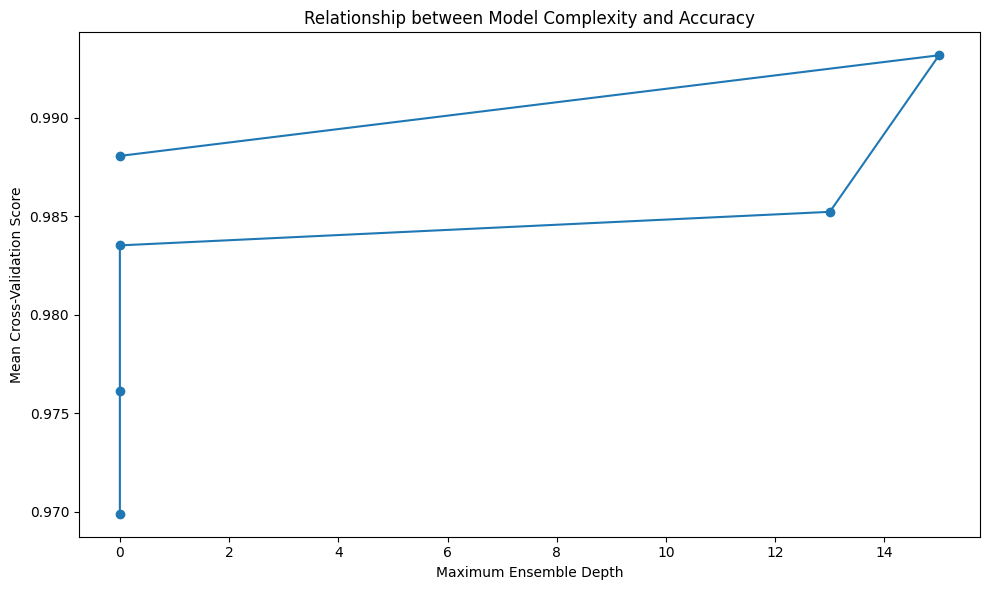

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('crop_recommendation.csv')
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Store mean scores for each model
mean_scores = []
# Store model complexity estimates (using two methods)
model_complexity_params = []  # Stores number of non-zero elements in coefficients
model_complexity_depth = []  # Stores maximum depth of ensemble (for Random Forest)
for name, model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Score: {scores.mean():.2f}")

    # Model complexity estimate 1: Number of non-zero elements in coefficients (general approach)
    if hasattr(model, 'coef_'):  # Check if model has 'coef_' attribute
        model_complexity_params.append(np.count_nonzero(model.coef_))
    else:
        model_complexity_params.append(0)  # Set 0 for models without coefficients

    # Model complexity estimate 2: Maximum depth of ensemble (for Random Forest)
    if isinstance(model, RandomForestClassifier):
        model_complexity_depth.append(model.estimators_[0].get_depth())  # Access depth of first tree
    elif isinstance(model, DecisionTreeClassifier):
        model_complexity_depth.append(model.get_depth())
    else:
        model_complexity_depth.append(0)  # Set 0 for non-tree models

    print()

# Import numpy for counting non-zero elements (if not already imported)
import numpy as np

# Extract model names from the list (corrected the typo)
model_names = [model_name for model_name in models]



# **Option 2: Line plot using maximum depth (for ensemble models)**
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(model_complexity_depth, mean_scores, marker='o', linestyle='-')
plt.xlabel("Maximum Ensemble Depth")  # Change label if using depth
plt.ylabel("Mean Cross-Validation Score")
plt.title("Relationship between Model Complexity and Accuracy")

# Display the plot
plt.tight_layout()
plt.show()
